Data Extraction from https://en.wikipedia.org/wiki/
-  I decided to extract data about the list of cities in the United Kingdom. I opened and parsed the wikipedia webpage after making sure the necessary libraries were installed.

## 3. Import libraries (install if needed)

In [110]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


## 2. Read the webpage and parse it with BeautifulSoup

In [111]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


## 3. Perform Extraction
- I extract data by printing the raw data

In [112]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\n\nImage\n\nCity[3][1]\n\nYear grantedor confirmed\n\nCity council status\n\nNation/region\n\nCity Population[b]\n\n\n\n\nCity of London6\n\ntime immemorial\n\nLocal government district(sui generis and ceremonial county)\nMap\n\n\nGreater London, England\n\n7,375 (2011)[16]\n\n\n\n\nWestminster21\n\n1540\n\nLocal government distric(London borough)\nMap\n\n\nGreater London, England\n\n219,396 (2011)[16]\n\n\n\n\nBirmingham2\n\n188933\n\nLocal government district(Metropolitan borough)\nMap\n\n\nWest Midlands, England\n\n1,092,330 (2013)[17]\n\n\n\n\nLeeds1\n\n1893\n\nLocal government district(Metropolitan borough)\nMap\n\n\nYorkshire and the Humber, England\n\n751,485 (2011)[16]\n\n\n\n\nGlasgow32(Scots: Glesga)(Scottish Gaelic: Glaschu)\n\n18th century[4](Burgh: 1492)\n\nLocal government district(Council area)\nMap\n\n\nScotland\n\n593,24538\n\n\n\n\nSheffield3\n\n1893\n\nLocal government district(Metropolitan borough)\nMap\n\n\nYorkshire and the Humber, England\n\n552,698 (2011)[16]

- show raw data in table to understand it better and figure out what is not necessary

In [121]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom'
tables = pd.read_html(url)
tables[0]


,Image,City[3][1],Year granted or confirmed,City council status,Nation/region,City Population[b]
0,NaN,City of London6,time immemorial,Local government district (sui generis and cer...,"Greater London, England","7,375 (2011)[16]"
1,NaN,Westminster21,1540,Local government distric (London borough) Map,"Greater London, England","219,396 (2011)[16]"
2,NaN,Birmingham2,188933,Local government district (Metropolitan boroug...,"West Midlands, England","1,092,330 (2013)[17]"
3,NaN,Leeds1,1893,Local government district (Metropolitan boroug...,"Yorkshire and the Humber, England","751,485 (2011)[16]"
4,NaN,Glasgow32 (Scots: Glesga) (Scottish Gaelic: Gl...,18th century[4] (Burgh: 1492),Local government district (Council area) Map,Scotland,59324538
...,...,...,...,...,...,...
71,NaN,Ripon1,1865,Civil parish Map,"Yorkshire and the Humber, England","16,702 (2011)[37]"
72,NaN,Armagh11 (Irish: Ard Mhacha) (Ulster-Scots: Ai...,1994,"None. Represented on Armagh City, Banbridge an...",Northern Ireland,"14,777 (2011)[21]"
73,NaN,Wells1,time immemorial,Civil parish Map,"South West, England","10,536 (2011)[38]"
74,NaN,St Asaph37 (Welsh: Llanelwy),2012,Community Map,Wales,"3,355 (2011)[39]"


- raw CSV file

In [117]:
df = tables[1]
df.to_csv('UK_cities')

## 4. Transform and load data (take out image column and put in alphabetical order)
- I saw that the images didn't show and they were not necessary to analyze this data
- put in alphabetical order makes more sense rather than it being in a random order
- figure out the names of columns to then take out images

In [118]:
print(df.columns)

Index(['Map', 'Key'], dtype='object')


- transform by sorting taking out image because it's irrelevant, and not transferrable
- also transform by sorting cities in alphabetical order
- load and process the data in csv

In [119]:
import pandas as pd

# Load the table from the Wikipedia page
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom")[0]

# Simplify column names if they're multi-level
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Drop the 'Image' column or its variations
df = df[[col for col in df.columns if not any(name in col for name in ['Image', 'I m a g e'])]]

# Identify the city column (assuming it's named 'City' or 'Name')
city_column_name = [col for col in df.columns if col in ['C i t y [ 3 ] [ 1 ]']][0]

# Sort by city names
df_sorted = df.sort_values(by=city_column_name)

# Display the sorted DataFrame in a table format
print(df_sorted)


                                  C i t y [ 3 ] [ 1 ]  \
30  Aberdeen32 (Scots: Aiberdeen) (Scottish Gaelic...   
72  Armagh11 (Irish: Ard Mhacha) (Ulster-Scots: Ai...   
58            Bangor (County Down) (Irish: Beannchar)   
69                                  Bangor (Gwynedd)1   
56                                              Bath1   
..                                                ...   
49                                        Winchester1   
23                                    Wolverhampton16   
52                                         Worcester3   
44                           Wrexham (Welsh: Wrecsam)   
32                                            York1,8   

   Y e a r   g r a n t e d   o r   c o n f i r m e d  \
30                              189131 (Burgh: 1179)   
72                                              1994   
58                                            202248   
69                                   time immemorial   
56                                 

## 5. Data visualization
I decided to visualize the population data in a bar graph to easily see the comparison in population in each city. This was the most interesting and important piece of data since you can gain insights from it such as the major urban centers.


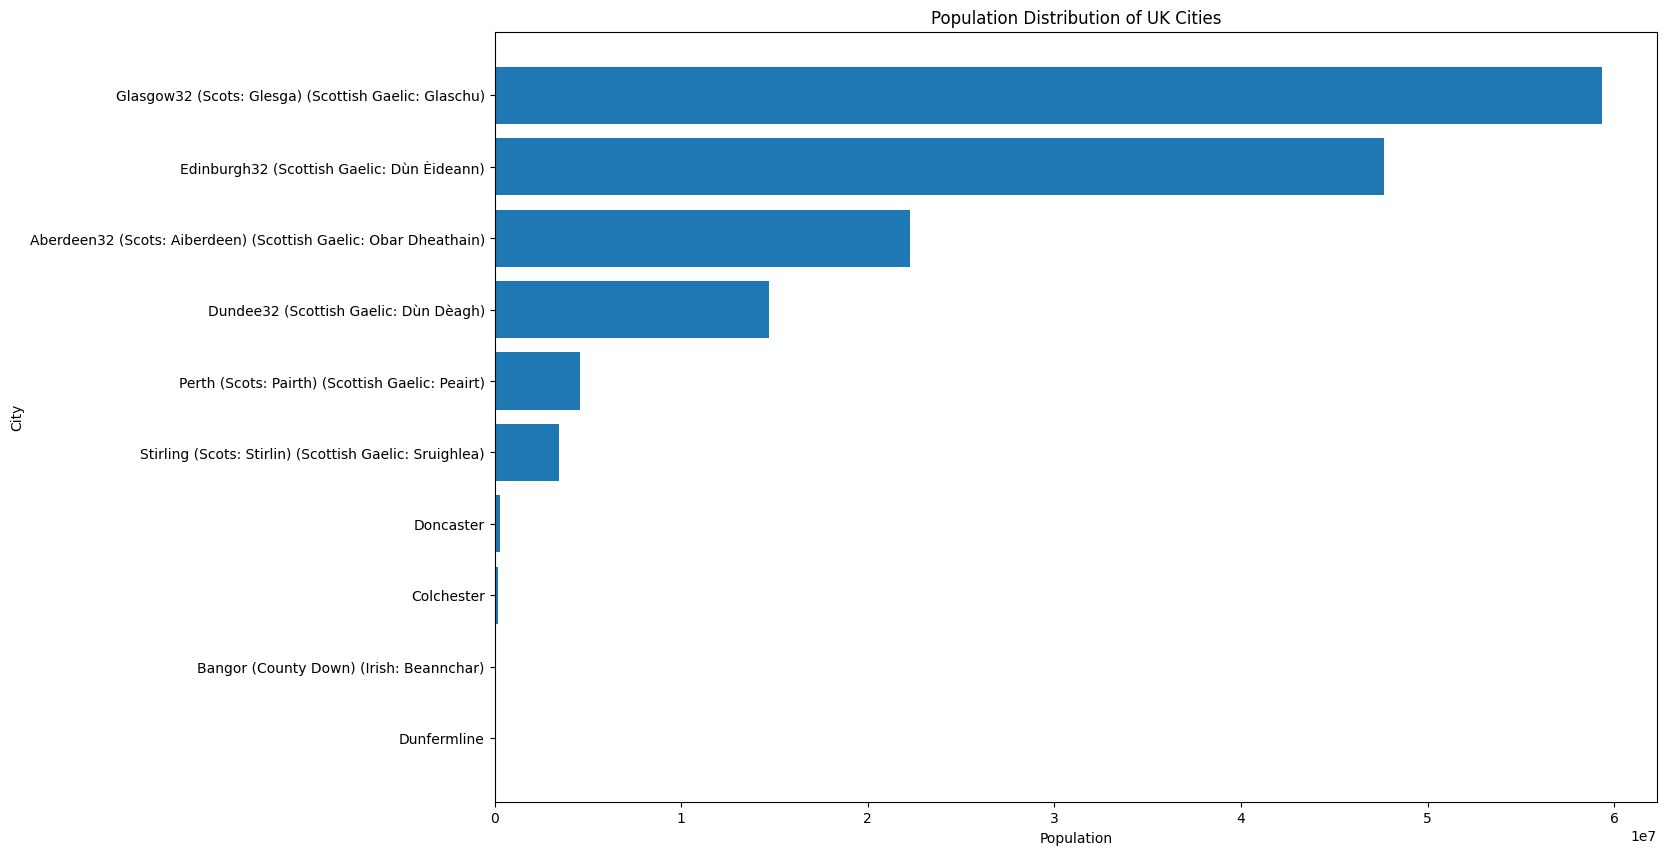

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the table from the Wikipedia page
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom")[0]

# Simplify column names if they're multi-level
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Clean the population column (assuming it's labeled 'Population' or contains 'Population')
# Convert the column to numbers (remove commas, non-numeric characters, etc.)
population_column_name = [col for col in df.columns if 'C i t y   P o p u l a t i o n [ b ]' in col][0]
df[population_column_name] = pd.to_numeric(df[population_column_name].astype(str).str.replace(',', ''), errors='coerce')


# Plotting
plt.figure(figsize=(15, 10))
df_sorted = df.sort_values(by=population_column_name, ascending=False)
plt.barh(df_sorted[city_column_name], df_sorted[population_column_name])
plt.xlabel('Population')
plt.ylabel('City')
plt.title('Population Distribution of UK Cities')
plt.gca().invert_yaxis()  # To have the city with the highest population at the top
plt.show()


Descriptive statistics: The bar graph shows in decsending order the highest to lowest populations and makes it clear what insights to draw from this, seeing which areas are the most concetrated and urbanized. The population bar graph visualization, sorted from highest (Glasgow) to lowest (Dunfermline), gives me a clear representation of the significant population variations among UK cities, highlighting cities with substantial population size in comparison to cities with low populations in the dataset.